In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'data.xlsx', index_col= 0, parse_dates=True )

In [3]:
# df["Date"] = pd.to_datetime(df["Date"])
df.tail(5)

,RLI,ALICL,NLICL,SLICL,PLIC,LICL,NLIC
Date,,,,,,,
2021-05-13,688,1290,1137,850,868,2330,2065
2021-05-16,715,1322,1185,889,908,2415,2100
2021-05-17,711,1316,1180,895,901,2417,2140
2021-05-18,712,1331,1260,915,914,2409,2145
2021-05-19,711,1350,1280,908,909,2388,2140


In [4]:
 #df["month"] = df["Date"].dt.month

## calculate moving average using rolling mean

In [5]:
close_px = df['NLIC']
mavg = close_px.rolling(30).mean()
mavg.tail(1)

Date
2021-05-19    2068.133333
Name: NLIC, dtype: float64

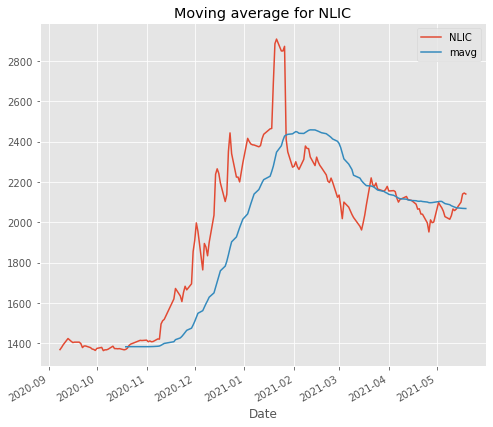

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__
style.use('ggplot')

close_px.plot(label='NLIC')
mavg.plot(label='mavg')
plt.title('Moving average for NLIC')
plt.legend()

## calculations of return

Text(0, 0.5, 'Return')

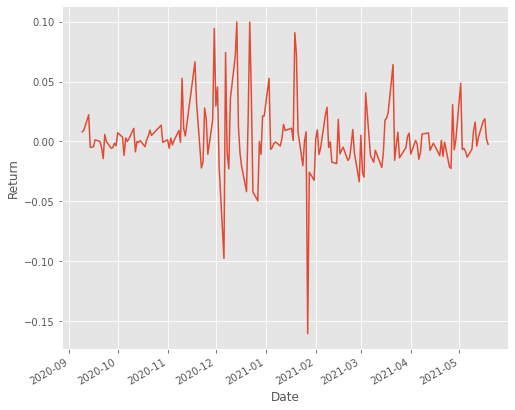

In [7]:
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')
plt.ylabel('Return')

In [8]:
l = df 
m = l.pct_change()
m.head()

,RLI,ALICL,NLICL,SLICL,PLIC,LICL,NLIC
Date,,,,,,,
2020-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,0.100000,0.008253,0.024967,0.067708,0.023511,0.019350,0.008035
2020-09-10,0.098930,0.028649,0.016667,0.042276,0.041348,0.006780,0.009420
2020-09-13,0.099757,0.026525,0.011349,0.001560,0.019118,0.051178,0.022254
2020-09-14,0.099558,-0.021964,-0.023691,-0.017134,-0.025974,-0.016015,-0.004916


## correlation and plot

,RLI,ALICL,NLICL,SLICL,PLIC,LICL,NLIC
RLI,1.000000,0.512193,0.459073,0.572463,0.541876,0.365360,0.348433
ALICL,0.512193,1.000000,0.727247,0.807433,0.829416,0.692418,0.555888
NLICL,0.459073,0.727247,1.000000,0.668604,0.762474,0.579176,0.564442
SLICL,0.572463,0.807433,0.668604,1.000000,0.838062,0.618037,0.545905
PLIC,0.541876,0.829416,0.762474,0.838062,1.000000,0.621113,0.558746
LICL,0.365360,0.692418,0.579176,0.618037,0.621113,1.000000,0.553805
NLIC,0.348433,0.555888,0.564442,0.545905,0.558746,0.553805,1.000000


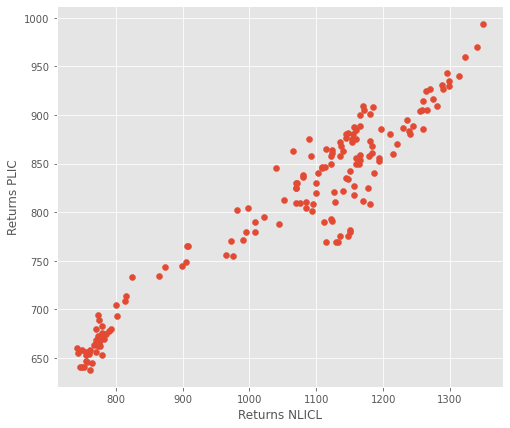

In [9]:
corr = m.corr()
plt.scatter(l.NLICL, l.PLIC)
plt.xlabel('Returns NLICL')
plt.ylabel('Returns PLIC')

corr

## Let's plot on scatter matrix

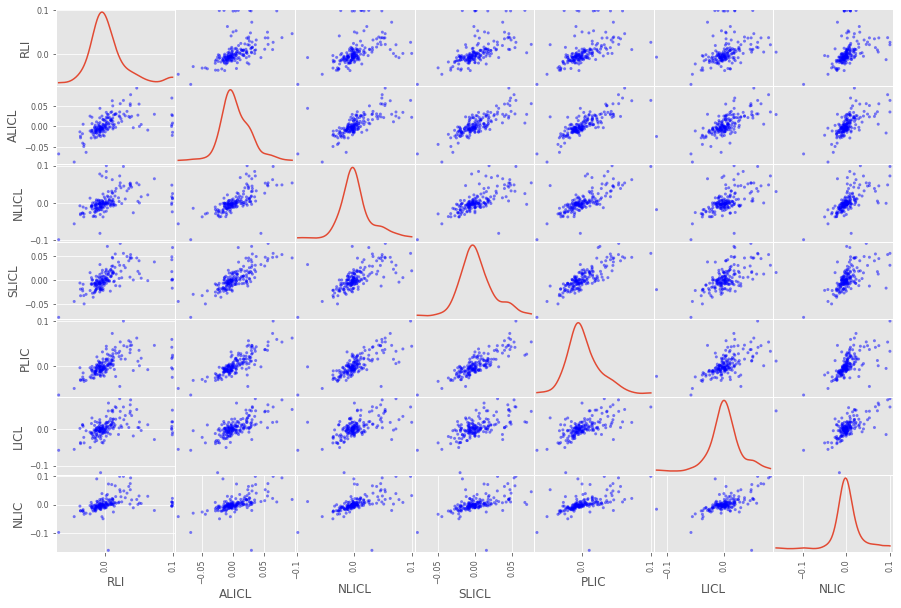

In [10]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(m, diagonal='kde', figsize=(15, 10), color = 'blue');

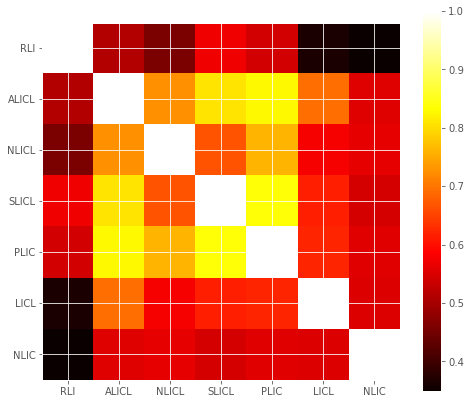

In [11]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## expected return versus risk

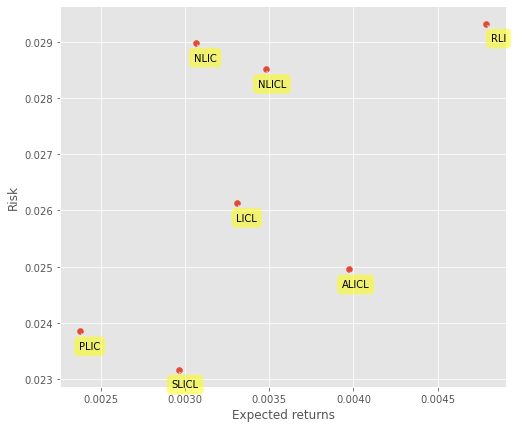

In [12]:
plt.scatter(m.mean(), m.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(m.columns, m.mean(), m.std()):
    plt.annotate(
        label, 
xy = (x, y), xytext = (20, -20),
textcoords = 'offset points', ha = 'right', va = 'bottom',
bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))